# Scatter plot

In [1]:
from implementation.LDA import LDA
from implementation.QDA import QDA
from implementation.NB import NB
from implementation.dataset_generation import generate_dataset2
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = generate_dataset2(a=2, ro=0.5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### LDA

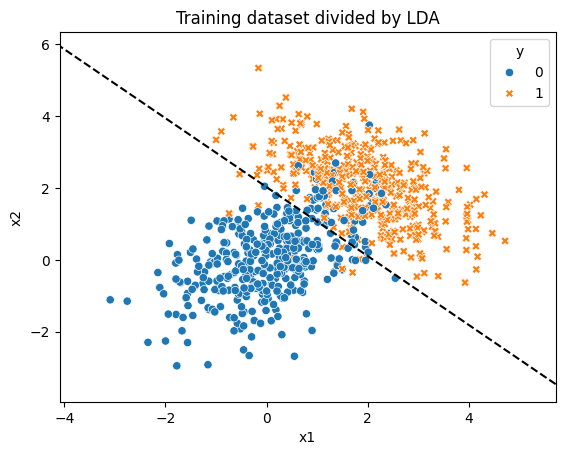

In [3]:
# plot dataset
df = pd.DataFrame(X_train, columns=['x1', 'x2'])
df['y'] = y_train
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df).set_title('Training dataset divided by LDA')

# fit LDA and get parameters
lda = LDA()
lda.fit(X_train, y_train)

params = lda.get_params()
cov = params['cov_matrix']
means0, means1 = params['means0'], params['means1']
pi0, pi1 = params['prior_proba0'], params['prior_proba1']

inv_cov = np.linalg.inv(cov)

# calculate boundary by finding the hyperplane for which LDF(x) = 0
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x_vec = np.array([xx[i, j], yy[i, j]])
        Z[i, j] = (inv_cov @ (means0 - means1)).T @ x_vec - 0.5 * (means0 - means1).T @ inv_cov @ (means0 + means1) + np.log(pi0 / pi1)

plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')

### QDA

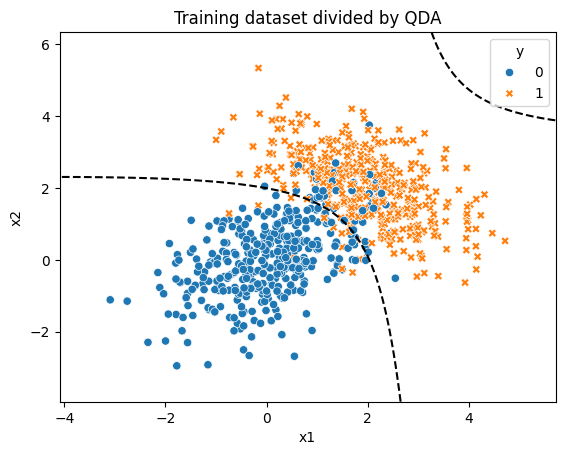

In [4]:
# plot dataset
df = pd.DataFrame(X_train, columns=['x1', 'x2'])
df['y'] = y_train
sns.scatterplot(x='x1', y='x2', hue='y', style='y', data=df).set_title('Training dataset divided by QDA')

# fit QDA and get parameters
qda = QDA()
qda.fit(X_train, y_train)

params = qda.get_params()
cov0, cov1 = params['cov_matrix0'], params['cov_matrix1']
means0, means1 = params['means0'], params['means1']
pi0, pi1 = params['prior_proba0'], params['prior_proba1']

inv_cov0, inv_cov1 = np.linalg.inv(cov0), np.linalg.inv(cov1)

# calculate boundary by finding the hyperplane for which QDF(x) = 0
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        x_vec = np.array([xx[i, j], yy[i, j]])
        sigma0 = - 0.5 * np.log(np.linalg.det(cov0)) - 0.5 * (x_vec - means0).T @ inv_cov0 @ (x_vec - means0) + np.log(pi0)
        sigma1 = - 0.5 * np.log(np.linalg.det(cov1)) - 0.5 * (x_vec - means1).T @ inv_cov1 @ (x_vec - means1) + np.log(pi1)
        Z[i, j] = sigma0 - sigma1

plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='--')